<a href="https://colab.research.google.com/github/Kiet2k2/phantichdulieu/blob/main/doan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170508288/170498071 [==============================] - 3s 0us/step


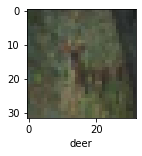

In [1]:
import numpy as np
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense,Activation
# hàm này để hiển thị các tấm ảnh 
import matplotlib.pyplot as plt


# tải cơ sở dữ liệu CIFAR10 vào colab 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

# Thiết lập các nhãn để cho mô hình nhận diện
train_Y = train_Y.reshape(-1)
classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# Kiểm soát kích thước hình ảnh hiển thị để dễ dàng nhận biết

#Thử hiển thị một hình ảnh bất kì và hiển thị nhãn tương ứng của nó từ tập train_Y
plt.figure(figsize = (15,2))
plt.imshow(train_X[10])
plt.xlabel(classes[train_Y[10]])

# chuẩn hóa dữ liệu về kiểu float
train_X = train_X.astype('float32')
train_X = train_X / 255
test_X = test_X.astype('float32')
test_X = test_X / 255
#print(train_X)
#print(test_X)

nb_class=10
y_train=np_utils.to_categorical(train_Y,nb_class)
y_test=np_utils.to_categorical(test_Y,nb_class)

# Xây dựng mô hình CNN
cnn = models.Sequential([
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
])

# Huấn luyện mô hình
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 117s 74ms/step - loss: 1.5204 - accuracy: 0.4450 - val_loss: 1.2356 - val_accuracy: 0.5603
Epoch 2/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.1314 - accuracy: 0.6009 - val_loss: 1.0576 - val_accuracy: 0.6292
Epoch 3/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.9622 - accuracy: 0.6645 - val_loss: 0.9489 - val_accuracy: 0.6753
Epoch 4/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.8469 - accuracy: 0.7082 - val_loss: 0.9062 - val_accuracy: 0.6909
Epoch 5/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.7624 - accuracy: 0.7364 - val_loss: 0.8735 - val_accuracy: 0.7049
Epoch 6/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.6857 - accuracy: 0.7627 - val_loss: 0.8767 - val_accuracy: 0.7062
Epoch 7/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.6195 - accuracy: 0.7847 - val_loss: 0.8678 - val_accu

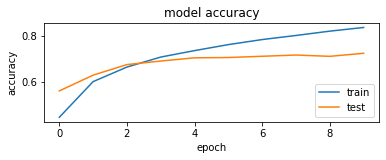

In [2]:
history = cnn.fit(train_X, train_Y, epochs=10, 
                    validation_data=(test_X, test_Y))

# Đánh giá mô hình, đường màu xanh là tỉ lệ đúng của tập train_X, đường màu cam là tỉ lệ đúng của test_X
fig = plt.figure ()
plt.subplot( 2,1,1 )
plt.plot(history.history['accuracy'])
plt.plot (history.history['val_accuracy'])
plt.title ('model accuracy')
plt.ylabel ('accuracy')
plt.xlabel ('epoch')
plt.legend (['train', 'test'], loc='lower right')



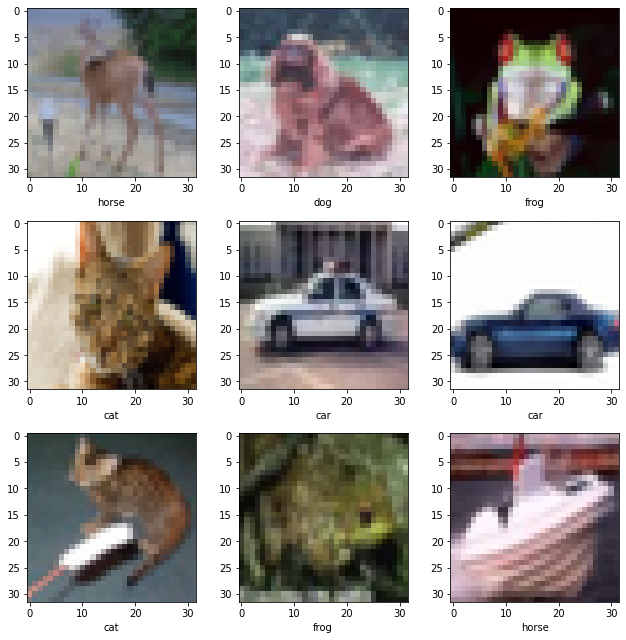

In [3]:
# Hiển thị ngẫu nhiên 9 tấm hình trong tập test và dự đoán
predicted_classes=cnn.predict(test_X)
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=i+100
  plt.imshow(test_X[num])
  y_classes = [np.argmax(element) for element in predicted_classes]
  plt.xlabel(classes[y_classes[num]])
plt.tight_layout()

#hàm dùng để load hình từ bên ngoài
def load_image(filename):
  import numpy as np
  from PIL import Image
  # load tấm ảnh lên
  global label_packed
  image = Image.open(filename)
  image = image.resize((32,32))
  image = np.expand_dims(image, axis = 0)
  image = np.array(image)
  img=image.astype('float32')
  #chuẩn hóa dữ liệu về 0-1
  img=img/255.0
  return img

Dự đoán hình ảnh:  frog


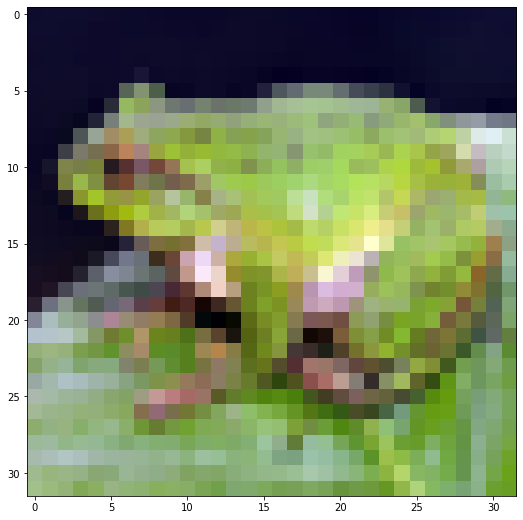

In [5]:
#Show hình và cho dự đoán
img_test = load_image("ech.jpg")
plt.imshow(img_test[0])
ob = cnn.predict(img_test)
print('Dự đoán hình ảnh: ',classes[np.argmax(ob)])